# 实验4 比热容比测定实验

## 液体比热容的测量

In [6]:
# 大学物理实验4 比热比测定实验-液体比热容测量数据处理
# Copyright(c) 2022 GeorgeDong32. All Rights Reserved.

from cProfile import label
import scipy.constants as cst 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
# plt防止中文乱码
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 待拟合函数定义
def fit_fun1(B, k1, b1):
    return k1 * B + b1

def fit_fun2(B, k2, b2):
    return k2 * B + b2

#数据导入
data_w = pd.read_csv("LiquidSHC_PWater.csv")
t_w = data_w.iloc[:,0]
ln_w = data_w.iloc[:,1]

data_b = pd.read_csv("LiquidSHC_Brine.csv")
t_b = data_b.iloc[:,0]
ln_b = data_b.iloc[:,1]

#数据拟合
popt1,pcov1=curve_fit(fit_fun1,t_w,ln_w)
ln_w_fit = fit_fun1(t_w,popt1[0],popt1[1])

popt2,pcov2=curve_fit(fit_fun2,t_b,ln_b)
ln_b_fit = fit_fun1(t_b,popt2[0],popt2[1])

# 数据计算
S_w = popt1[0]
S_b = popt2[0]
m_container = 130.23
m_w = 147.79 - m_container
m_b = 149.06 - m_container
c_w = 4.18
c_container = 0.389
c_b = ((S_w / S_b) * (m_w*c_w + m_container*c_container) - (m_container*c_container)) / m_b
print(c_b)

5.32264919940542


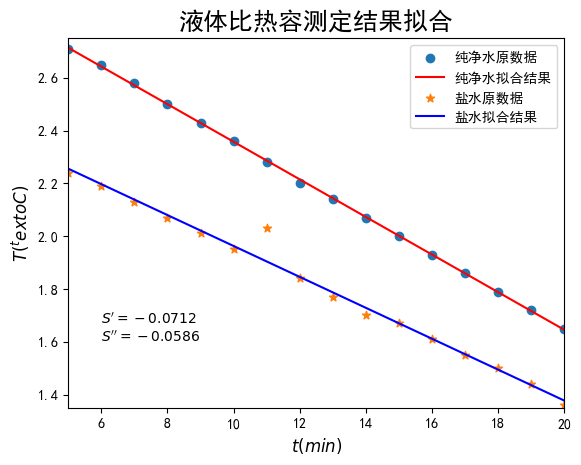

In [7]:
#绘制图形
## 数据绘图区
plt.figure()
plt.axis([5,20,1.35,2.75])
plt.scatter(t_w,ln_w,marker='o',label="纯净水原数据")
plt.plot(t_w,ln_w_fit,color='red',label="纯净水拟合结果")
plt.scatter(t_b,ln_b,marker='*',label="盐水原数据")
plt.plot(t_b,ln_b_fit,color='blue',label="盐水拟合结果")
plt.xlabel("$t(min)$",fontsize=12)
plt.ylabel("$T(^text {o}C)$",fontsize=12)
plt.annotate("$S' = %.4f$\n$S'' = %.4f$" %(S_w,S_b), xy=(6,1.6))
plt.title("液体比热容测定结果拟合",fontsize=18)
plt.legend()
plt.savefig(".\LiquidSHC.png")

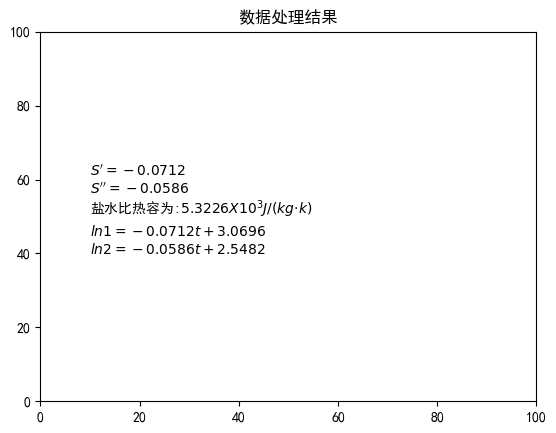

In [8]:
## 数据计算区
plt.figure()
plt.axis([0,100,0,100])
plt.annotate("$S' = %.4f$\n$S'' = %.4f$\n盐水比热容为:$%.4fX 10^3 J/(kg·k)$\n$ln1 = %.4f t + %.4f$\n$ln2 = %.4f t + %.4f$" %(S_w,S_b,abs(c_b),popt1[0],popt1[1],popt2[0],popt2[1]), xy=(10,40))
plt.title("数据处理结果")
plt.show()